## EDA on Haberman Cancer-Survival-DataSet

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data set firstly - 

In [20]:
haberman = pd.read_csv('/media/rahul0324/Disk-D/Applied_Dataset/Haberman-Dataset/haberman.csv')

In [21]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [22]:
haberman.shape

(305, 4)

From the above output it's clear that there are 305 rows and 4 columns.

Acording to kaggle haberman dataset it's said that the 1st column is patient age, 2nd column is operation year, 3rd column is no. of positive axillary nodes and the last column tells us patient survival status:

If the survival status is 1 - 

    then the patient survived 5 years or longer
    
If the survival status is 2 - 

    then the patient died within 5 year

In [23]:
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

Now firstly lets rename the column with appropriate names- 

In [24]:
df = haberman.rename(columns={"30":"ptent_age", "64":"oper_yr", "1":"axillary_nodes", "1.1":"survival_status"})

In [25]:
df.shape

(305, 4)

In [26]:
df.columns

Index(['ptent_age', 'oper_yr', 'axillary_nodes', 'survival_status'], dtype='object')

It's clear from the above output that there are 3 features and we have to find out the survial status

In [27]:
df.head()

,ptent_age,oper_yr,axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [28]:
df.tail()

,ptent_age,oper_yr,axillary_nodes,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


Now firstly lets change the survival status as yes or no, yes means 1 and no means 2 - 

In [30]:
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})

In [31]:
df.tail()

,ptent_age,oper_yr,axillary_nodes,survival_status
300,75,62,1,yes
301,76,67,0,yes
302,77,65,3,yes
303,78,65,1,no
304,83,58,2,no


In [32]:
df.head()

,ptent_age,oper_yr,axillary_nodes,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [34]:
df['survival_status'].value_counts()

yes    224
no      81
Name: survival_status, dtype: int64

It's clear that there are 2 class (i.e yes or no) and yes class have 224 data points and no class have 81 data points.

## Objective - 
      We have to classify that after giving patient_age, operation_year and no. of positive axillary nodes              
      whether patient survive (5 years or longer) or less than 5 years.

## Univariate Analysis - 

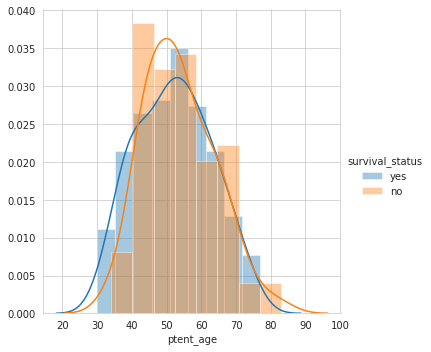

In [61]:
sns.FacetGrid(df, hue = 'survival_status', height = 5)\
   .map(sns.distplot, "ptent_age")\
   .add_legend()                                        # this graph is based on patient_age
plt.show()

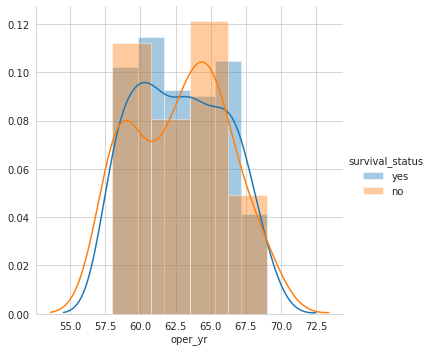

In [62]:
sns.FacetGrid(df, hue = "survival_status", height = 5)\
   .map(sns.distplot, "oper_yr")\
   .add_legend()                                        # this graph is based on operation year
plt.show()

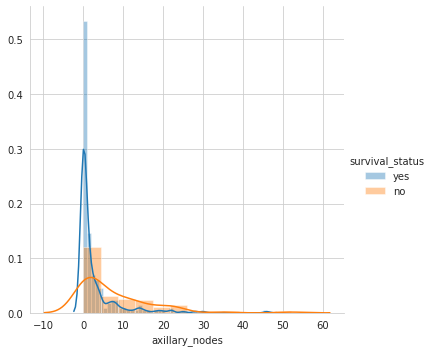

In [63]:
sns.FacetGrid(df, hue = "survival_status", height = 5)\
   .map(sns.distplot, "axillary_nodes")\
   .add_legend()                                    # this graph is based on number of positive axillary nodes-
plt.show()

So from the above graph it's clear that number of axillary nodes feature is more important than others - 

## Now let's see box plot of all the features

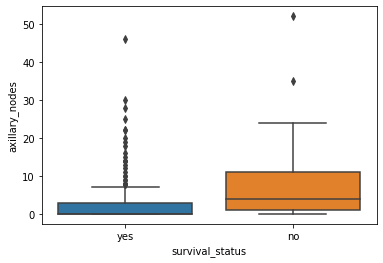

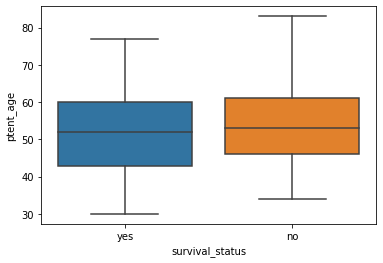

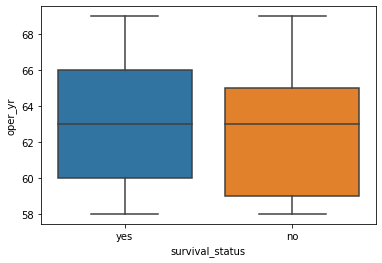

In [52]:
sns.boxplot(x = "survival_status", y = "axillary_nodes", data = df)
plt.show()
sns.boxplot(x = "survival_status", y = "ptent_age", data = df)
plt.show()
sns.boxplot(x = "survival_status", y = "oper_yr", data = df)
plt.show()

From the above box-plot also it's clear that only axillary node feature is important for classification point

## Lets see violin plots

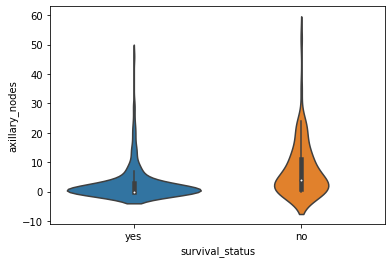

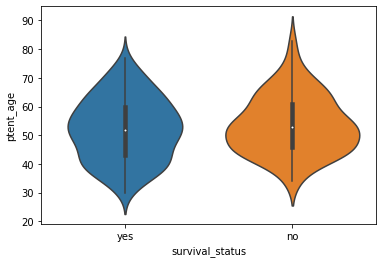

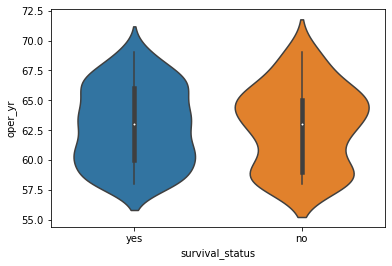

In [55]:
sns.violinplot(x = "survival_status", y = "axillary_nodes", data = df, size = 8)
plt.show()
sns.violinplot(x = "survival_status", y = "ptent_age", data = df, size = 8)
plt.show()
sns.violinplot(x = "survival_status", y = "oper_yr", data = df, size = 8)
plt.show()

So it is clearly showing that using operation year and patient age feature we can't classify but using number of axillary nodes feature some how we can come up with some logic

so, let's see some bi-variate analysis - 

## Scatter plots - 

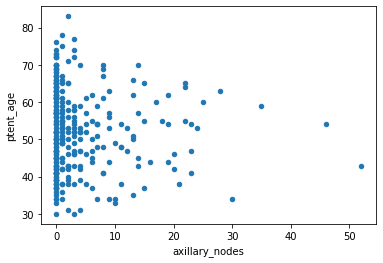

In [57]:
df.plot(kind = "scatter", x = "axillary_nodes", y = "ptent_age")
plt.show()

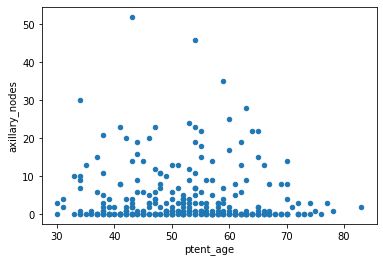

In [58]:
df.plot(kind = "scatter", x = "ptent_age", y = "axillary_nodes")
plt.show()

Since we can't find anything by seeing like this so let's differentiate the survival status using coloring - 

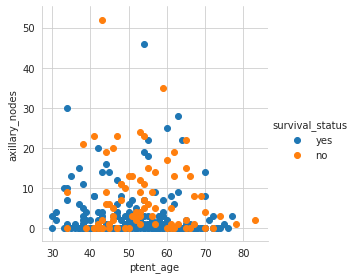

In [60]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", height = 4)\
   .map(plt.scatter, "ptent_age", "axillary_nodes")\
   .add_legend()
plt.show()

We can't classify using this combination as its completely mixed up. 
So lets see some other combination

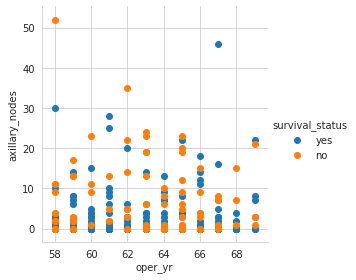

In [64]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", height = 4)\
   .map(plt.scatter, "oper_yr", "axillary_nodes")\
   .add_legend()
plt.show()

seems this combination is also not going to contribute anything regarding classificaton - 

let's see pair plot using that we can say which combination is important or not any combination is going to be important